<a href="https://colab.research.google.com/github/rupanshu1710/Java-Troops/blob/main/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image

In [14]:
img_width, img_height = 224, 224

train_data_dir = '/content/drive/MyDrive/new dataset/train'
validation_data_dir = '/content/drive/MyDrive/new dataset/test'
nb_train_samples = 8000
nb_validation_samples = 1800
epochs = 10
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


train_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 6716 images belonging to 9 classes.
Found 849 images belonging to 9 classes.


In [15]:
from numpy.random import seed
seed(1)

In [16]:
import tensorflow
tensorflow.random.set_seed(2)

In [17]:
from tensorflow.keras.applications.vgg19 import VGG19

base_model = VGG19(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

Copying files: 0 files [01:04, ? files/s]


80150528/80134624 [==============================] - 1s 0us/step


In [18]:
from tensorflow.keras import layers
from keras.models import load_model
from keras.layers import Lambda
import tensorflow as tf# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
y = layers.Dense(224, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(9, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])
model.summary()
for layer in base_model.layers:
    layer.trainable = False

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])
vgghist = model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 100, epochs = 30)


Epoch 1/30
100/100 [==============================] - 731s 7s/step - loss: 2.0023 - accuracy: 0.3861 - val_loss: 1.5480 - val_accuracy: 0.5336
Epoch 2/30
100/100 [==============================] - 306s 3s/step - loss: 1.2834 - accuracy: 0.5756 - val_loss: 1.5572 - val_accuracy: 0.5430
Epoch 3/30
100/100 [==============================] - 181s 2s/step - loss: 1.0719 - accuracy: 0.6461 - val_loss: 1.5020 - val_accuracy: 0.5536
Epoch 4/30
100/100 [==============================] - 116s 1s/step - loss: 1.0187 - accuracy: 0.6716 - val_loss: 1.5036 - val_accuracy: 0.5783
Epoch 5/30
100/100 [==============================] - 89s 887ms/step - loss: 0.8373 - accuracy: 0.7300 - val_loss: 1.3071 - val_accuracy: 0.6078
Epoch 6/30
100/100 [==============================] - 79s 787ms/step - loss: 0.7524 - accuracy: 0.7406 - val_loss: 1.2852 - val_accuracy: 0.6254
Epoch 7/30
100/100 [==============================] - 60s 601ms/step - loss: 0.6320 - accuracy: 0.7929 - val_loss: 1.3986 - val_accuracy: 

In [21]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

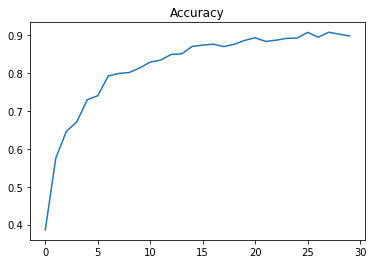

In [23]:
plt.title("Accuracy")
plt.plot(vgghist.history["accuracy"])
plt.show()

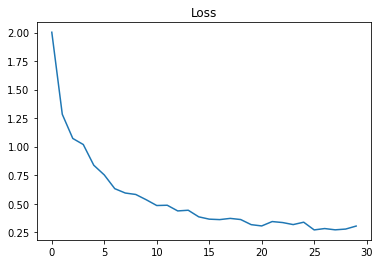

In [24]:


plt.title("Loss")
plt.plot(vgghist.history["loss"])
plt.show()



In [20]:
import pickle
pickle.dump(vgghist,open("dotslash.sav", "wb"))

INFO:tensorflow:Assets written to: ram://9367970d-6adf-4d00-98da-fa8a15a5dd84/assets


In [25]:

from tensorflow.keras import Model
base_model.save_weights('"/content/drive/MyDrive/new dataset/classifyWaste.h5"')
base_model.save('/content/drive/MyDrive/new dataset/model')




INFO:tensorflow:Assets written to: /content/drive/MyDrive/new dataset/model/assets
